In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns; sns.set()
from datetime import datetime

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\data\la_crimes\Crime_Data_from_2020_to_Present.csv')
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


### Creating a weapon - description tab

In [4]:
weapon_codes = df.groupby(['Weapon Used Cd', 'Weapon Desc'])['Part 1-2'].apply('sum').to_frame()
weapon_codes.reset_index(inplace=True)
weapon_codes.head(2)

,Weapon Used Cd,Weapon Desc,Part 1-2
0,101.0,REVOLVER,1161
1,102.0,HAND GUN,19715


In [5]:
weapon_codes.drop(columns='Part 1-2', inplace=True)
weapon_codes.shape

(79, 2)

### Creating a  premises - description tab

In [6]:
len(df['Premis Cd'].unique())

314

In [7]:
len(df['Premis Desc'].unique())

307

In [8]:
premises_codes = df.groupby(['Premis Cd', 'Premis Desc'])['Part 1-2'].apply('sum').to_frame()
premises_codes.reset_index(inplace=True)
premises_codes.head(2)

,Premis Cd,Premis Desc,Part 1-2
0,101.0,STREET,261299
1,102.0,SIDEWALK,52094


In [9]:
premises_codes.drop(columns='Part 1-2', inplace=True)
premises_codes.shape

(307, 2)

### Creating a crime codes - description tab

In [10]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [11]:
len(df['Crm Cd'].unique())

138

In [12]:
len(df['Crm Cd Desc'].unique())

138

In [13]:
crime_codes = df.groupby(['Crm Cd', 'Crm Cd Desc'])['Part 1-2'].apply('sum').to_frame()
crime_codes.reset_index(inplace=True)
crime_codes.head(2)

,Crm Cd,Crm Cd Desc,Part 1-2
0,110,CRIMINAL HOMICIDE,1456
1,113,"MANSLAUGHTER, NEGLIGENT",7


In [14]:
crime_codes.drop(columns='Part 1-2', inplace=True)
crime_codes.size

276

In [15]:
crime_codes.shape

(138, 2)

### Data cleaning

In [16]:
columns_keep = [
    'DATE OCC', 'Part 1-2', 'Crm Cd',
    'Vict Age', 'Vict Sex', 'Vict Descent',
    'Premis Cd', 'Weapon Used Cd', 'LAT','LON'
]

df = df[columns_keep]
df.head(2)

,DATE OCC,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON
0,01/08/2020 12:00:00 AM,2,624,36,F,B,501.0,400.0,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,2,624,25,M,H,102.0,500.0,34.0459,-118.2545


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857658 entries, 0 to 857657
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE OCC        857658 non-null  object 
 1   Part 1-2        857658 non-null  int64  
 2   Crm Cd          857658 non-null  int64  
 3   Vict Age        857658 non-null  int64  
 4   Vict Sex        744408 non-null  object 
 5   Vict Descent    744400 non-null  object 
 6   Premis Cd       857648 non-null  float64
 7   Weapon Used Cd  298191 non-null  float64
 8   LAT             857658 non-null  float64
 9   LON             857658 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 65.4+ MB


#### Datetime col

In [18]:
df.iloc[0,0]

'01/08/2020 12:00:00 AM'

In [19]:
df['Date'] = df['DATE OCC'].str.split(' ').str.get(0)
df.head(2)

,DATE OCC,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,Date
0,01/08/2020 12:00:00 AM,2,624,36,F,B,501.0,400.0,34.0141,-118.2978,01/08/2020
1,01/01/2020 12:00:00 AM,2,624,25,M,H,102.0,500.0,34.0459,-118.2545,01/01/2020


In [20]:
df.drop(columns='DATE OCC', inplace=True)

In [21]:
new_col = ['Date', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Vict Sex',
           'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'LAT', 'LON']

df = df.reindex(columns=new_col)

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format=r'%m/%d/%Y')
df.head(2)

,Date,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON
0,2020-01-08,2,624,36,F,B,501.0,400.0,34.0141,-118.2978
1,2020-01-01,2,624,25,M,H,102.0,500.0,34.0459,-118.2545


In [23]:
df.drop(df[df['Date'] == datetime(2020,2,29)].index, inplace=True)

In [24]:
df['Day of y'] = df['Date'].dt.day_of_year

In [25]:
mask1 = df['Date'].dt.year != 2023
df = df[mask1]

#### handling the day of the year on 2020 (leap year)

In [26]:
mask1 = df['Date'].dt.year == 2020
mask2 = df['Day of y'] > 60

df.loc[mask1 & mask2, 'Day of y'] -= 1

In [27]:
pd.set_option('display.max_rows', 10)

## Crimes by day

In [29]:
crimes_by_day = df.groupby('Day of y')['Part 1-2'].count().to_frame()
crimes_by_day.head()

,Part 1-2
Day of y,
1,2996
2,1611
3,1719
4,1605
5,1606


<Axes: xlabel='Day of y'>

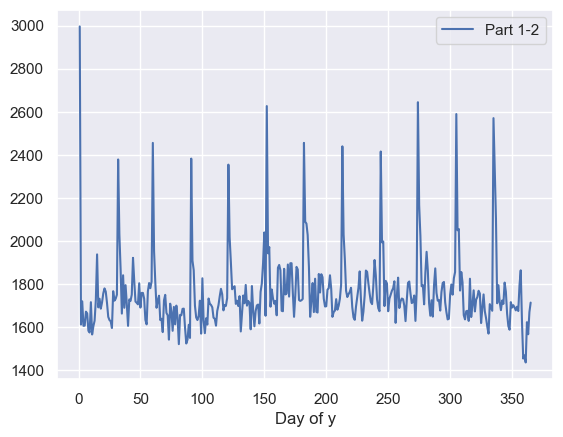

In [30]:
crimes_by_day.plot()

In [35]:
crimes_by_day.rename(columns={'Part 1-2':'Count'}, inplace=True)
crimes_by_day.reset_index(inplace=True)

In [37]:
week_of_y = np.ceil(crimes_by_day['Day of y']/7)
week_of_y.tail()

360    52.0
361    52.0
362    52.0
363    52.0
364    53.0
Name: Day of y, dtype: float64

In [38]:
week_of_y.iloc[-1] = 52

In [42]:
crimes_by_week = crimes_by_day.groupby(week_of_y)['Count'].mean().to_frame()
crimes_by_week.head()

,Count
Day of y,
1.0,1838.714286
2.0,1627.714286
3.0,1756.142857
4.0,1677.428571
5.0,1877.000000


In [45]:
crimes_by_week['Count'] = crimes_by_week['Count'].astype('int32')
crimes_by_week.rename(columns={'Count':'Mean'}, inplace=True)

<Axes: xlabel='Day of y'>

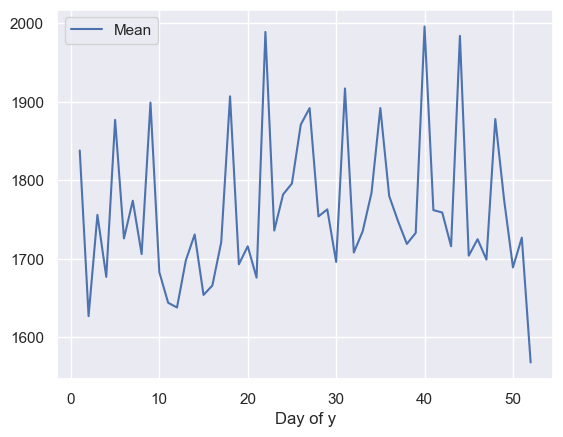

In [46]:
crimes_by_week.plot()

## Relation between end of month and crimes

In [47]:
df.head()

,Date,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,Day of y
0,2020-01-08,2,624,36,F,B,501.0,400.0,34.0141,-118.2978,8
1,2020-01-01,2,624,25,M,H,102.0,500.0,34.0459,-118.2545,1
2,2020-02-13,2,845,0,X,X,726.0,NaN,34.0448,-118.2474,44
3,2020-01-01,2,745,76,F,W,502.0,NaN,34.1685,-118.4019,1
4,2020-01-01,2,740,31,X,X,409.0,NaN,34.2198,-118.4468,1


In [49]:
date_ser = df['Date'].copy()

In [51]:
mask = date_ser != datetime(2020,2,29)
date_ser = date_ser[mask]

In [ ]:
date_ser = date_ser.to_frame()

In [63]:
mask1 = date_ser['Date'].dt.is_month_end
mask2 = (date_ser['Date'] == datetime(2020,2,28))

date_ser['Month end'] = (mask1 | mask2)

date_ser.head()

,Date,Month end
0,2020-01-08,False
1,2020-01-01,False
2,2020-02-13,False
3,2020-01-01,False
4,2020-01-01,False


In [65]:
date_ser['Month start'] = date_ser['Date'].dt.is_month_start

0 --> normal day

1 --> the start of a month

2 --> the end of a month

In [69]:
date_ser['Month'] = 0
date_ser.loc[date_ser['Month start'], 'Month'] = 1
date_ser.loc[date_ser['Month end'], 'Month'] = 2
date_ser.head()

,Date,Month end,Month start,Month
0,2020-01-08,False,False,0
1,2020-01-01,False,True,1
2,2020-02-13,False,False,0
3,2020-01-01,False,True,1
4,2020-01-01,False,True,1


In [83]:
start_end = date_ser.groupby('Date')['Month'].agg([('Type','mean'), ('Count','count')])
start_end.head()

,Type,Count
Date,,
2020-01-01,1.0,1114
2020-01-02,0.0,527
2020-01-03,0.0,595
2020-01-04,0.0,541
2020-01-05,0.0,505


In [89]:
start_end_hist = start_end.groupby('Type')['Count'].mean()
start_end_hist = start_end_hist.reset_index()
start_end_hist

,Type,Count
0,0.0,578.516129
1,1.0,841.750000
2,2.0,575.166667


<Axes: xlabel='Type'>

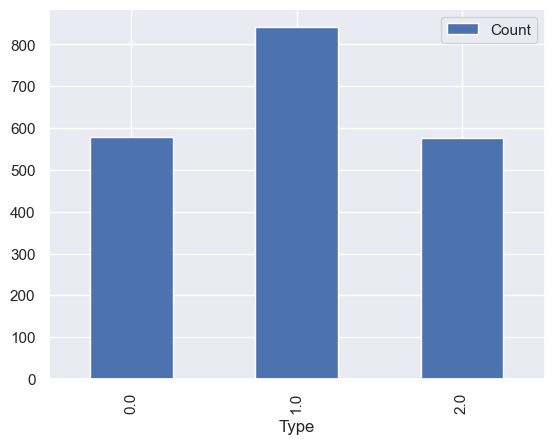

In [90]:
start_end_hist.plot.bar(x='Type', y='Count')

## Relation places and crimes